In [3]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from win32clipboard import CF_MAX
import pandas as pd


Extracting EDF parameters from \\143.107.220.27\Biomag\biomagla\TMS\EEG\Tarefa\FingerTapping\Voluntario_Luan\mut_18_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 633999  =      0.000 ...   633.999 secs...
Using matplotlib as 2D backend.


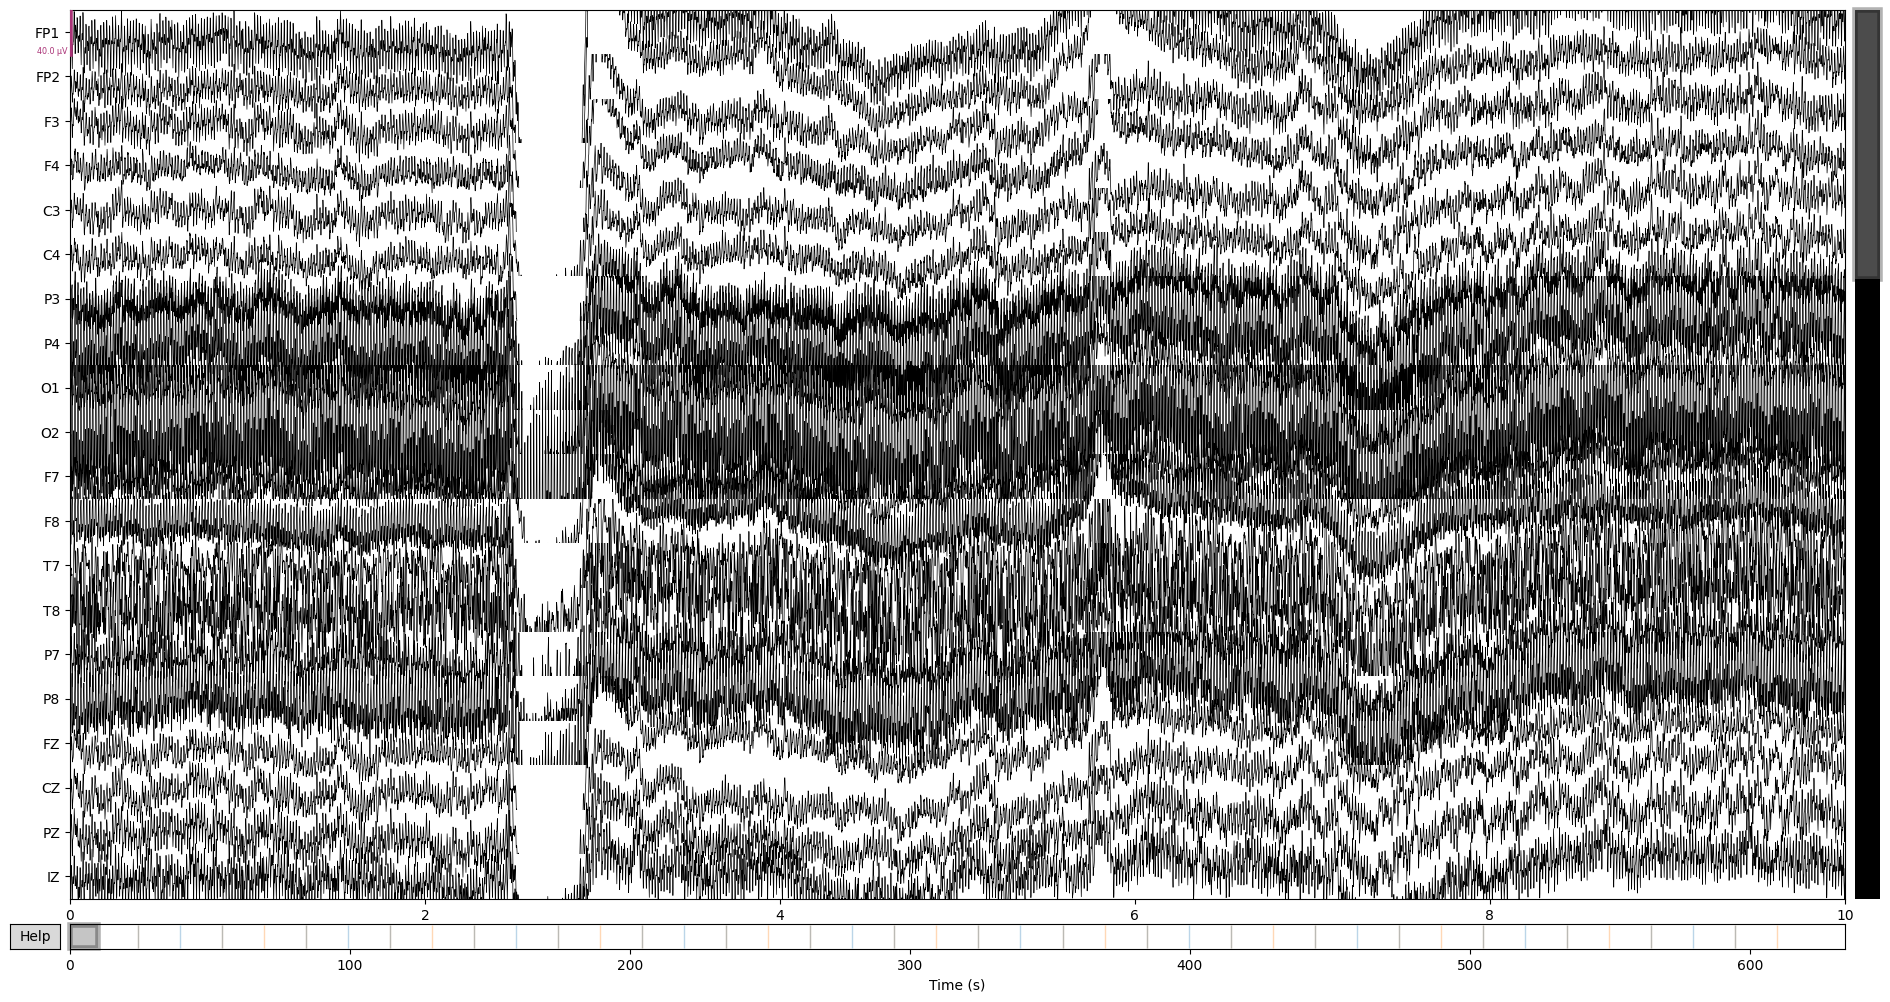

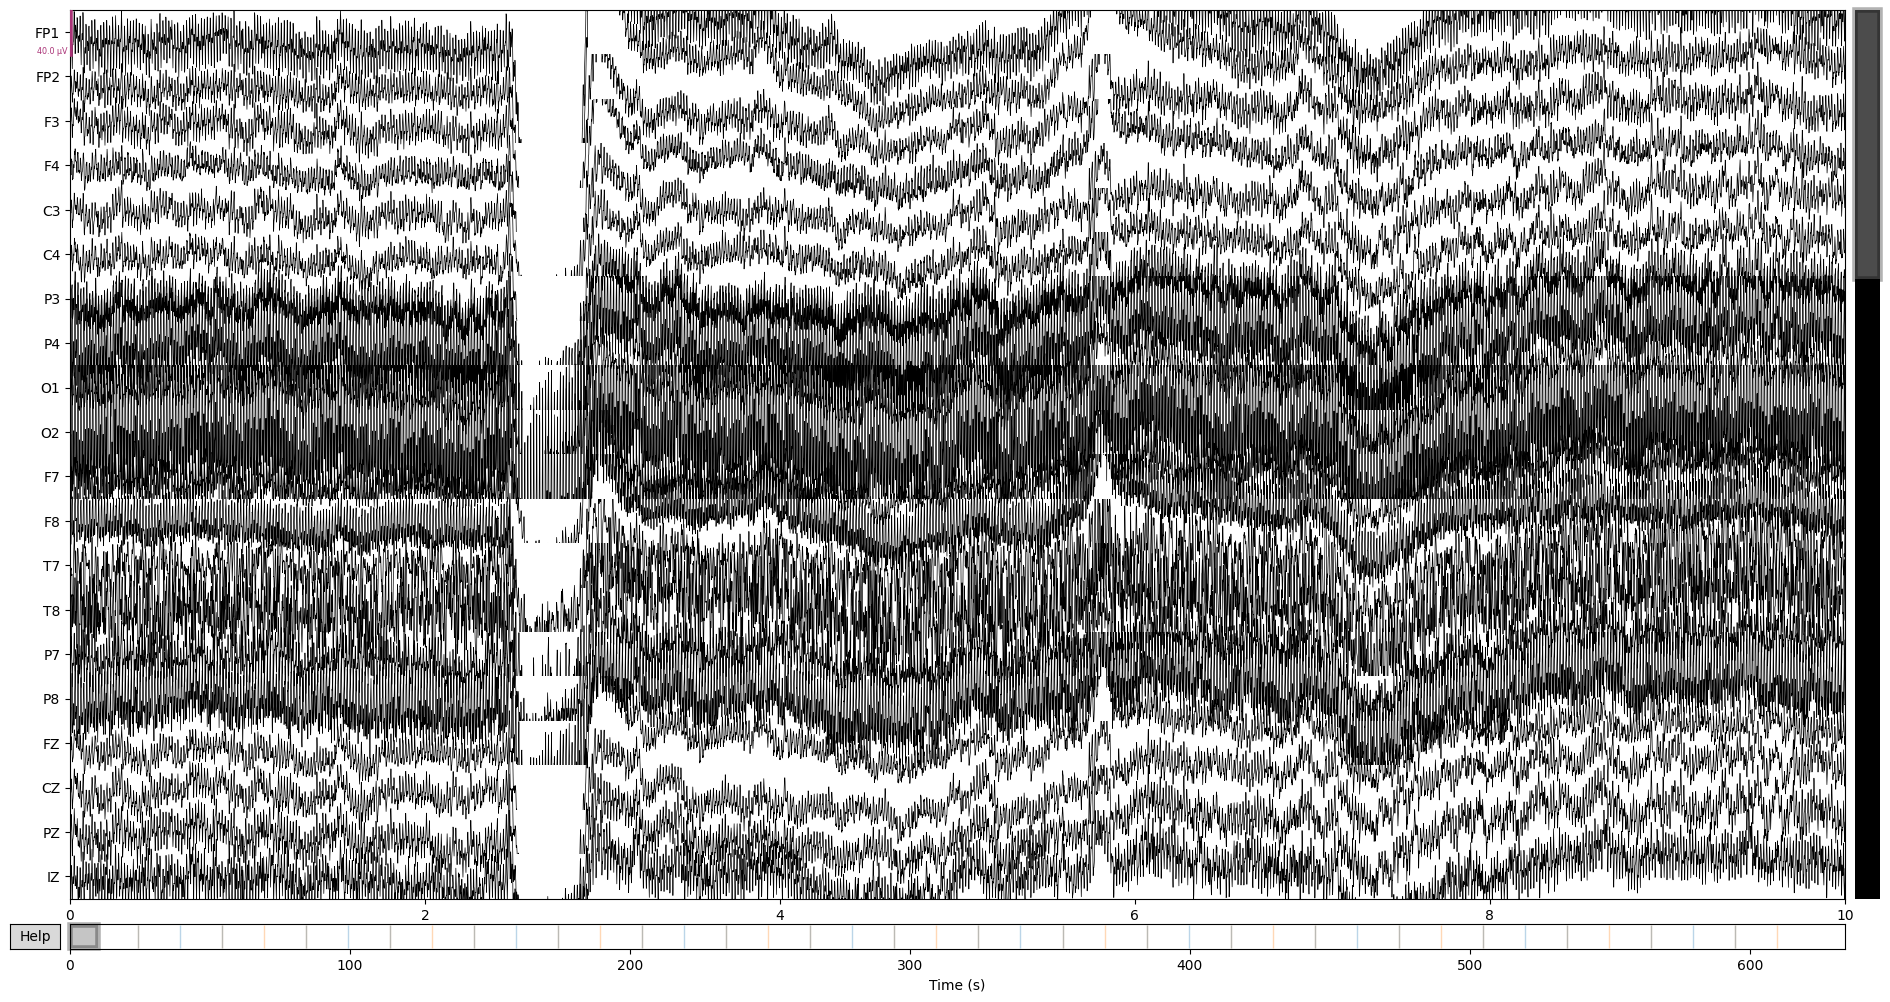

In [6]:
rawData = mne.io.read_raw_edf(r"\\143.107.220.27\Biomag\biomagla\TMS\EEG\Tarefa\FingerTapping\Voluntario_Luan\mut_18_03.edf", preload=True)
rawData.info
rawData.ch_names
rawData.plot()

In [3]:
rawData.drop_channels(['EOG2', 'EMG'])

Measurement date,"May 06, 2025 21:21:50 GMT"
Experimenter,Unknown
Participant,TestPerson
Digitized points,Not available
Good channels,65 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,500.00 Hz


In [4]:
rawData.set_channel_types({
                           'EOG':'eog',
                           })


Measurement date,"May 06, 2025 21:21:50 GMT"
Experimenter,Unknown
Participant,TestPerson
Digitized points,Not available
Good channels,"64 EEG, 1 EOG"
Bad channels,None
EOG channels,EOG
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,500.00 Hz


In [5]:
rawData.rename_channels({'AFz': 'AFZ',
                       'FCz':'FCZ',
                       'Fp1': 'FP1', 
                       'Fp2': 'FP2', 
                       'Fz':'FZ', 
                       'Cz': 'CZ', 
                       'Pz':'PZ', 
                       'Iz':'IZ', 
                       'FpZ':'FPZ', 
                       'CPz':'CPZ', 
                       'POz':'POZ', 
                       'Oz':'OZ'
                       })

Measurement date,"May 06, 2025 21:21:50 GMT"
Experimenter,Unknown
Participant,TestPerson
Digitized points,Not available
Good channels,"64 EEG, 1 EOG"
Bad channels,None
EOG channels,EOG
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,500.00 Hz


In [16]:
def upperToRenameChannels(channels):
    return {item: item.upper() for item in channels}

montage = mne.channels.make_standard_montage("standard_1020",head_size='auto')
montage.rename_channels(upperToRenameChannels(montage.ch_names))
rawData.set_montage(montage)

Measurement date,"May 06, 2025 21:21:50 GMT"
Experimenter,Unknown
Participant,TestPerson
Digitized points,67 points
Good channels,"64 EEG, 1 EOG"
Bad channels,None
EOG channels,EOG
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,500.00 Hz


In [17]:
rawData.filter(l_freq=1.0, h_freq=250.0, fir_design='firwin')
rawData.notch_filter(freqs=60.0)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 250.00 Hz
- Upper transition bandwidth: 62.50 Hz (-6 dB cutoff frequency: 281.25 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.6s finished


Measurement date,"May 06, 2025 21:21:50 GMT"
Experimenter,Unknown
Participant,TestPerson
Digitized points,67 points
Good channels,"64 EEG, 1 EOG"
Bad channels,None
EOG channels,EOG
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,1.00 Hz
Lowpass,250.00 Hz


In [18]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(rawData)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 123.3s.


c:\Users\thaismarchetti\anaconda3\envs\emg_analysis\Lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=800
Fit,800 iterations on raw data (622750 samples)
ICA components,20
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


In [19]:
eog_epochs = mne.preprocessing.create_eog_epochs(rawData, reject_by_annotation=True)
eog_inds, scores = ica.find_bads_eog(eog_epochs)
print("Componentes identificados como EOG:", eog_inds)

Using EOG channel: EOG
EOG channel index for this subject is: [32]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 125 significant peaks
Number of EOG events detected: 125
Not setting metadata
125 matching events found
No baseline correction applied
Using data from preloaded Raw for 125 events and 1001 original time points ...
2 bad epochs dropped
Using EOG channel: EOG
Comp

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [20]:
ica.exclude = eog_inds

# 5. Aplicar a remoção dos componentes de artefato
raw_corrected = ica.apply(rawData.copy())

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 64 PCA components


Using matplotlib as 2D backend.


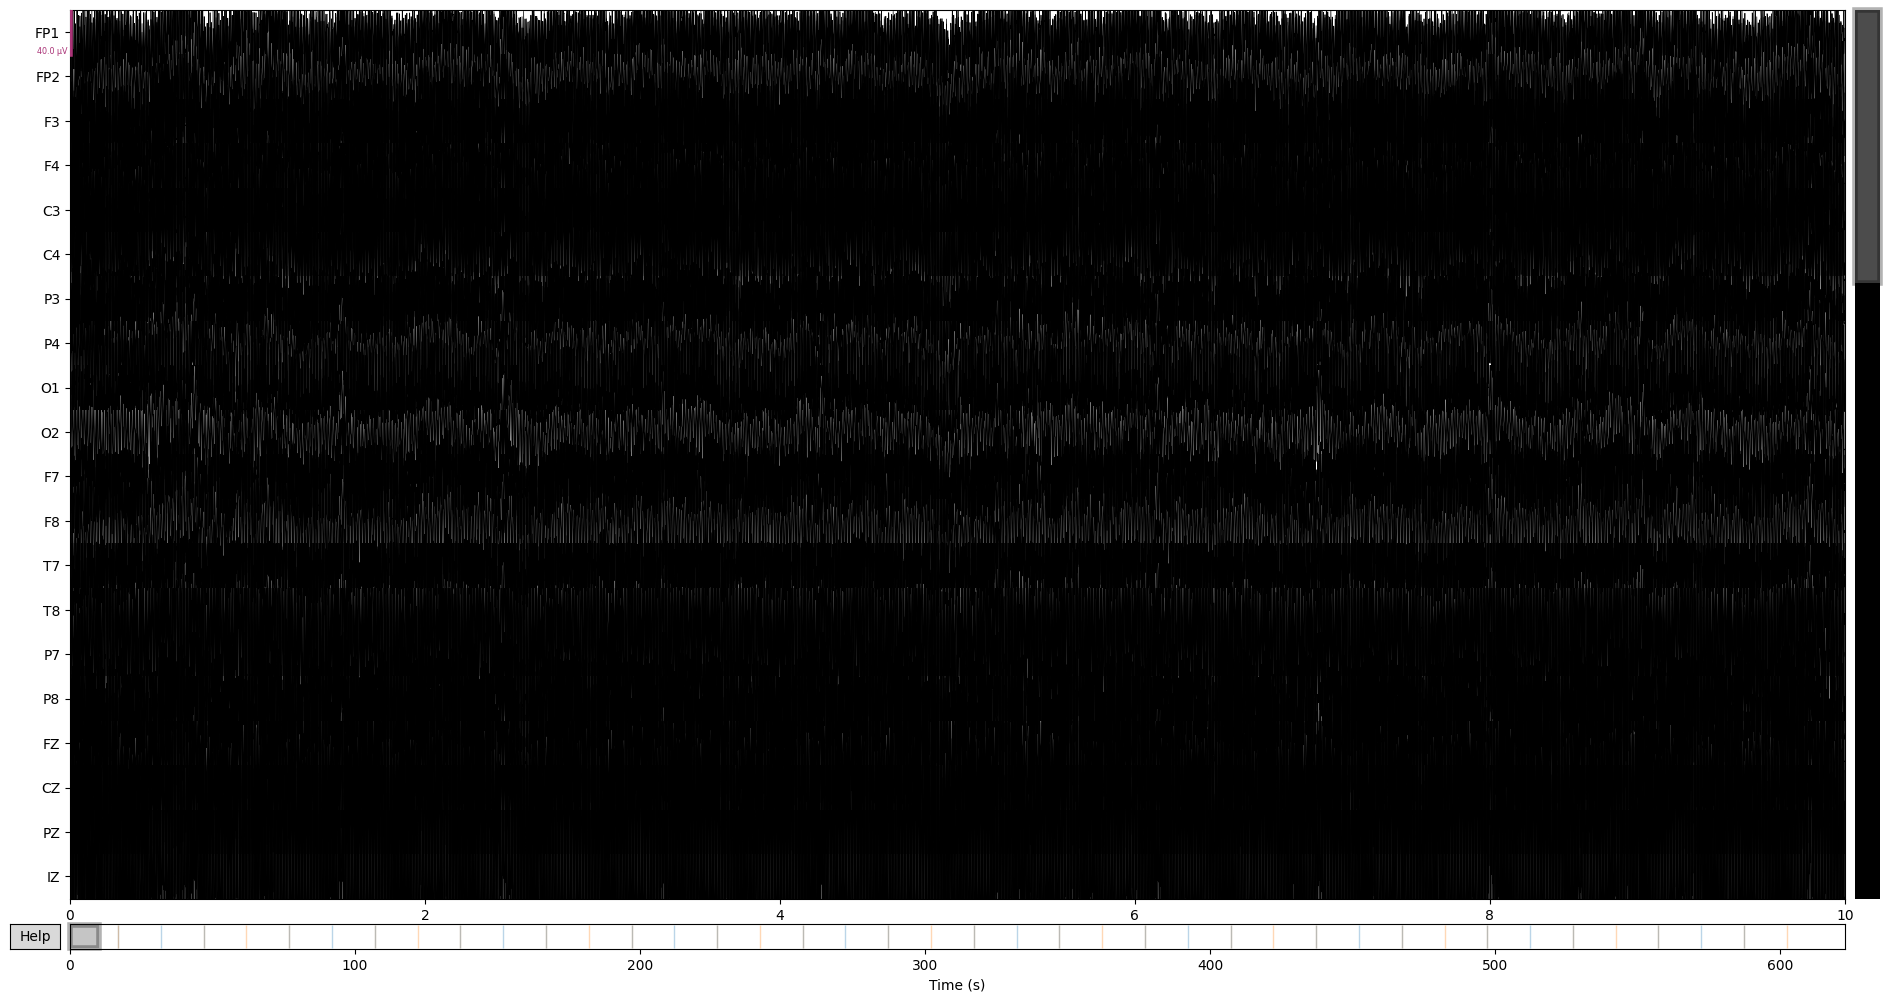

In [ ]:
#raw_corrected.plot()

In [15]:
# raw_corrected.plot_psd(fmax=70)

In [16]:
# raw_corrected.plot_psd_topomap()

In [25]:
events, event_id = mne.events_from_annotations(raw_corrected)
print(events.shape)
event_id

Used Annotations descriptions: [np.str_('Stimulus A'), np.str_('Video B')]
(60, 3)


{np.str_('Stimulus A'): 1, np.str_('Video B'): 2}

In [26]:
new_events = []
i = 0
while i < len(events):
    sample, _, code = events[i]
    # Verifica se o próximo evento ocorre no mesmo instante (ou dentro de um limiar se necessário)
    if i < len(events) - 1 and events[i+1][0] == sample:
        # Se ocorrer, assume que é a combinação dos estímulos
        new_events.append([sample, 0, 3])
        # Pula o próximo evento, pois ele já foi combinado
        i += 2
    else:
        new_events.append(events[i])
        i += 1

new_events = np.array(new_events)

In [27]:
event_id = {
    'Stimulus A': 1,
    'Video B': 2,
    'Stimulus A + Video B': 3
}

In [28]:
fig = mne.viz.plot_events(
    new_events, event_id=event_id, sfreq=raw_corrected.info["sfreq"], first_samp=raw_corrected.first_samp
)

In [29]:
epochs = mne.Epochs(
    raw_corrected,
    new_events,
    event_id=event_id,
    tmin=5,
    tmax=10,
    baseline=None,
    preload=True,
    # event_repeated='drop' # Importante
)

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 5001 original time points ...
0 bad epochs dropped


NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


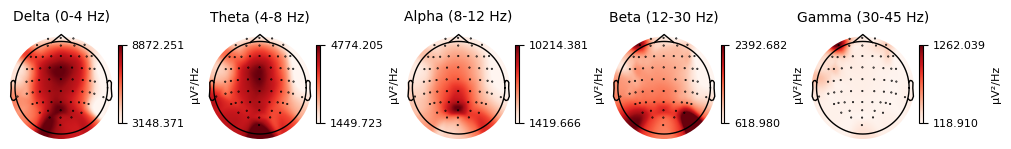

In [30]:
epochs["Video B"].plot_psd_topomap()

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


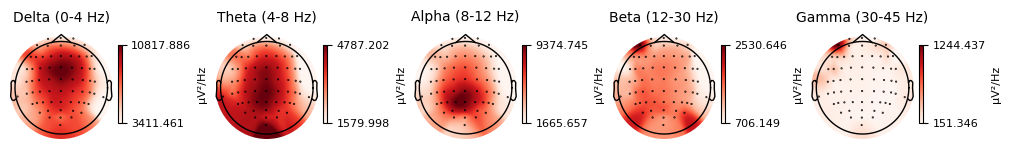

In [31]:
epochs["Stimulus A + Video B"].plot_psd_topomap()

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


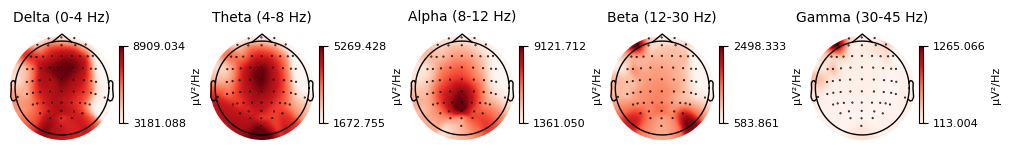

In [32]:
epochs["Stimulus A"].plot_psd_topomap()

In [33]:
type(epochs["Video B"])

mne.epochs.Epochs

In [34]:
epochs["Video B"].pick(['C3', 'C4'])

Number of events,10
Events,Video B: 10
Time range,5.000 – 10.000 s
Baseline,off


In [113]:
import numpy as np

def compute_band_area(epochs, channels=['C3', 'C4', 'CZ'], fmin=8, fmax=13):
    """
    Calcula a área sob a curva da densidade espectral (PSD) de uma banda
    para os canais especificados em cada epoch.

    Parâmetros:
    - epochs: objeto mne.Epochs (já separado por condição). Ex epochs["Stimulus A"]
    - channels: lista com os nomes dos canais (default: ['C3', 'C4'])
    - fmin, fmax: limites da banda de interesse (default: 8–13 Hz)

    Retorna:
    - psd_area: array (n_epochs, n_channels) com a área da PSD por epoch e canal
    - freqs: vetor de frequências usadas na integração
    """
    psd = epochs.copy().pick(channels).compute_psd(fmin=fmin, fmax=fmax)
    psd_data = psd.get_data()  
    freqs = psd.freqs
    psd_area = np.trapezoid(psd_data, freqs, axis=-1) 
    return psd_area


In [114]:
mean_A = epochs["Stimulus A"].copy().pick(['C3', 'C4', 'CZ']).get_data().mean(axis=2)  # Axis= 2 para calcular a média temporal de cada canal em cada epoch
std_A  = epochs["Stimulus A"].copy().pick(['C3', 'C4', 'CZ']).get_data().std(axis=2)

mean_B = epochs["Video B"].copy().pick(['C3', 'C4', 'CZ']).get_data().mean(axis=2)
std_B  = epochs["Video B"].copy().pick(['C3', 'C4', 'CZ']).get_data().std(axis=2)

mean_R = epochs["Stimulus A + Video B"].copy().pick(['C3', 'C4', 'CZ']).get_data().mean(axis=2)
std_R  = epochs["Stimulus A + Video B"].copy().pick(['C3', 'C4', 'CZ']).get_data().std(axis=2)

psd_area_mu_A = compute_band_area(epochs["Stimulus A"])
psd_area_mu_B = compute_band_area(epochs["Video B"])
psd_area_mu_R= compute_band_area(epochs["Stimulus A + Video B"])

psd_area_beta_A = compute_band_area(epochs["Stimulus A"], fmin=13, fmax=30)
psd_area_beta_B = compute_band_area(epochs["Video B"], fmin=13, fmax=30)
psd_area_beta_R= compute_band_area(epochs["Stimulus A + Video B"], fmin=13, fmax=30)


C:\Users\thaismarchetti\AppData\Local\Temp\ipykernel_49472\942066734.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  mean_A = epochs["Stimulus A"].copy().pick(['C3', 'C4', 'CZ']).get_data().mean(axis=2)  # Axis= 2 para calcular a média temporal de cada canal em cada epoch
C:\Users\thaismarchetti\AppData\Local\Temp\ipykernel_49472\942066734.py:2: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  std_A  = epochs["Stimulus A"].copy().pick(['C3', 'C4', 'CZ']).get_data().std(axis=2)
C:\Users\thaismarchetti\AppData\Local\Temp\ipykernel_49472\942066734.py:4: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  mean_B = epochs["Video B"].copy().pick(['C3', 'C4', 'CZ']).get_data().mean(axis=2)
C:\Users\thaismarchetti\AppData\Lo

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


In [ ]:
# DataFrame para Stimulus A
df_A = pd.DataFrame({
    'mu_C3': psd_area_mu_A[:, 0],
    'mu_C4': psd_area_mu_A[:, 1],
    'mu_CZ': psd_area_mu_A[:, 2],

    'beta_C3': psd_area_beta_A[:, 0],
    'beta_C4': psd_area_beta_A[:, 1],
    'beta_CZ': psd_area_beta_A[:, 2],

    'mean_C3': mean_A[:, 0],
    'mean_C4': mean_A[:, 1],
    'mean_CZ': mean_A[:, 2],

    'std_C3': std_A[:, 0],
    'std_C4': std_A[:, 1],
    'std_CZ': std_A[:, 2],
    'condicao': 'Stimulus A'
})

# DataFrame para Video B
df_B = pd.DataFrame({
    'mean_C3': mean_B[:, 0],
    'mean_C4': mean_B[:, 1],
    'mean_CZ': mean_B[:,2],

    'std_C3': std_B[:, 0],
    'std_C4': std_B[:, 1],
    'std_CZ': std_B[:, 2],


    'mu_C3': psd_area_mu_B[:, 0],
    'mu_C4': psd_area_mu_B[:, 1],
    'mu_CZ': psd_area_mu_B[:, 2],

    'beta_C3': psd_area_beta_B[:, 0],
    'beta_C4': psd_area_beta_B[:, 1],
    'beta_CZ': psd_area_beta_B[:, 2],

    'condicao': 'Video B'
})

# DataFrame para Stimulus A + Video B
df_R = pd.DataFrame({
    'mean_C3': mean_R[:, 0],
    'mean_C4': mean_R[:, 1],
    'mean_CZ': mean_R[:, 2],

    'std_C3': std_R[:, 0],
    'std_C4': std_R[:, 1],
    'std_CZ': std_R[:, 2],

    'mu_C3': psd_area_mu_R[:, 0],
    'mu_C4': psd_area_mu_R[:, 1],
    'mu_CZ': psd_area_mu_R[:, 2],

    'beta_C3': psd_area_beta_R[:, 0],
    'beta_C4': psd_area_beta_R[:, 1],
    'beta_CZ': psd_area_beta_R[:, 2],

    'condicao': 'Stimulus A + Video B'
})

# Concatenar tudo
feature_df = pd.concat([df_A, df_B, df_R], ignore_index=True)

# Visualizar
print(feature_df)

           mu_C3         mu_C4         mu_CZ       beta_C3       beta_C4  \
0   1.480616e-08  1.167436e-08  1.851978e-08  1.383709e-08  1.121359e-08   
1   1.499740e-08  1.597321e-08  1.965904e-08  1.797329e-08  1.539681e-08   
2   1.623223e-08  1.276533e-08  1.813571e-08  2.175224e-08  1.736432e-08   
3   1.736429e-08  1.684240e-08  2.410838e-08  2.059306e-08  1.958937e-08   
4   9.778506e-09  1.014498e-08  9.638521e-09  1.313708e-08  1.278734e-08   
5   2.245828e-08  2.056858e-08  2.634599e-08  2.005767e-08  1.810727e-08   
6   1.266592e-08  1.120865e-08  1.519020e-08  1.953335e-08  1.664644e-08   
7   2.160353e-08  2.026897e-08  2.841489e-08  1.933734e-08  1.624689e-08   
8   5.123766e-08  2.561914e-08  6.251127e-08  2.177070e-08  2.166935e-08   
9   3.370977e-08  2.570155e-08  5.230006e-08  2.147794e-08  1.524375e-08   
10  2.196077e-08  1.498777e-08  2.492775e-08  2.100496e-08  1.747477e-08   
11  2.476160e-08  1.923488e-08  3.208436e-08  2.316158e-08  1.822447e-08   
12  1.264905

: 

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Derreter o DataFrame para facilitar o uso no seaborn
melted_df = pd.melt(feature_df, id_vars='condicao', value_vars=['mu_C3', 'mu_C4'],
                    var_name='canal', value_name='area_psd')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='canal', y='area_psd', hue='condicao')
plt.title('Área sob a curva da PSD (banda mu: 8–13 Hz)')
plt.ylabel('Potência total (μV²)')
plt.xlabel('Canal')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [38]:
hold_on = epochs["Stimulus A + Video B"].get_data()
hand_1 = epochs["Stimulus A"].get_data()
hand_2 = epochs["Video B"].get_data()

C:\Users\thaismarchetti\AppData\Local\Temp\ipykernel_49472\2837951453.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  hold_on = epochs["Stimulus A + Video B"].get_data()
C:\Users\thaismarchetti\AppData\Local\Temp\ipykernel_49472\2837951453.py:2: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  hand_1 = epochs["Stimulus A"].get_data()
C:\Users\thaismarchetti\AppData\Local\Temp\ipykernel_49472\2837951453.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  hand_2 = epochs["Video B"].get_data()


In [39]:
import numpy as np
from mne.time_frequency import psd_array_welch
from sklearn.decomposition import PCA
from scipy.signal import butter, lfilter

# Configurações
epochs_c3c4 = epochs["Video B"].pick(['C3', 'C4'])
sfreq = epochs_c3c4.info['sfreq']
window_size = 1.0  # segundos
step_size = 0.5  # segundos
n_samples = epochs_c3c4.get_data().shape[2]
win_len = int(window_size * sfreq)
step_len = int(step_size * sfreq)

def bandpower(psd, freqs, fmin, fmax):
    mask = (freqs >= fmin) & (freqs <= fmax)
    return psd[:, mask].mean(axis=1)

def extract_features_epoch(epoch_data):
    features = []
    for start in range(0, epoch_data.shape[1] - win_len + 1, step_len):
        segment = epoch_data[:, start:start + win_len]

        # PSD
        psd, freqs = psd_array_welch(segment, sfreq=sfreq, fmin=1, fmax=70, n_fft=256)

        # Band powers
        mu = bandpower(psd, freqs, 8, 13)
        beta = bandpower(psd, freqs, 13, 30)
        alpha = bandpower(psd, freqs, 8, 13)
        theta = bandpower(psd, freqs, 4, 8)

        beta_alpha_ratio = beta / alpha
        theta_alpha_ratio = theta / alpha

        # PCA espectral
        pca = PCA(n_components=3)
        spectral_pca = pca.fit_transform(psd.T).flatten()

        # Estatísticas
        mean_val = np.mean(segment, axis=1)
        std_val = np.std(segment, axis=1)

        # Concatenar todas as features
        features.append(np.concatenate([
            mu, beta, beta_alpha_ratio, theta_alpha_ratio,
            spectral_pca, mean_val, std_val
        ]))
    return np.array(features)


C:\Users\thaismarchetti\AppData\Local\Temp\ipykernel_49472\1438569726.py:11: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_samples = epochs_c3c4.get_data().shape[2]


In [ ]:
from scipy import signal
fs = 1000  # Frequência de amostragem em Hz (ajuste conforme seu caso)
nfft = 2000  # Número de pontos da FFT
overlap = 128  # Pontos de sobreposição para o método Welch (opcional)

In [19]:
all_freq_power = []

for i in range(hold_on.shape[1]):
    freq_power = []
    for j in range(hold_on.shape[0]):
        time_series = hold_on[j, i, :]

        freqs, power = signal.welch(time_series, fs=fs, nperseg=nfft, noverlap=overlap)

        # Filtrar apenas as frequências de interesse (0 a 45Hz)
        mask = (freqs >= 0) & (freqs <= 45)
        freqs_filtered = freqs[mask]
        power_filtered = power[mask]

        # Interpolar para obter exatamente os bins de 0.5Hz desejados
        target_freqs = np.arange(0, 45.5, 0.5)
        power_interpolated = np.interp(target_freqs, freqs_filtered, power_filtered)
        freq_power.append(power_interpolated)
    all_freq_power.append(freq_power)

all_freq_hold = np.array(all_freq_power)

In [20]:
all_freq_power = []

for i in range(hand_1.shape[1]):
    freq_power = []
    for j in range(hand_1.shape[0]):
        time_series = hand_1[j, i, :]

        freqs, power = signal.welch(time_series, fs=fs, nperseg=nfft, noverlap=overlap)

        # Filtrar apenas as frequências de interesse (0 a 45Hz)
        mask = (freqs >= 0) & (freqs <= 45)
        freqs_filtered = freqs[mask]
        power_filtered = power[mask]

        # Interpolar para obter exatamente os bins de 0.5Hz desejados
        target_freqs = np.arange(0, 45.5, 0.5)
        power_interpolated = np.interp(target_freqs, freqs_filtered, power_filtered)
        freq_power.append(power_interpolated)
    all_freq_power.append(freq_power)

all_freq_hand_1 = np.array(all_freq_power)

In [21]:
all_freq_power = []

for i in range(hand_2.shape[1]):
    freq_power = []
    for j in range(hand_2.shape[0]):
        time_series = hand_2[j, i, :]

        freqs, power = signal.welch(time_series, fs=fs, nperseg=nfft, noverlap=overlap)

        # Filtrar apenas as frequências de interesse (0 a 45Hz)
        mask = (freqs >= 0) & (freqs <= 45)
        freqs_filtered = freqs[mask]
        power_filtered = power[mask]

        # Interpolar para obter exatamente os bins de 0.5Hz desejados
        target_freqs = np.arange(0, 45.5, 0.5)
        power_interpolated = np.interp(target_freqs, freqs_filtered, power_filtered)
        freq_power.append(power_interpolated)
    all_freq_power.append(freq_power)

all_freq_hand_2 = np.array(all_freq_power)

In [31]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Supondo que você tenha 3 arrays de shape (65, 10, 91)
# right_hand_data = ... # Array para movimento da mão direita (65, 10, 91)
# left_hand_data = ...  # Array para movimento da mão esquerda (65, 10, 91)
# no_move_data = ...    # Array para não movimento (65, 10, 91)

# Função para preparar os dados
def prepare_data(right_hand, left_hand, no_move):
    # Reorganizar os dados para classificação
    # Para cada época, vamos criar um exemplo com todas as frequências de todos os canais

    # Número de épocas por classe
    n_epochs = right_hand.shape[1]

    # Criar features: para cada época, achatamos todos os canais e frequências
    features_shape = (n_epochs * 3, 65 * 91)  # 3 classes, 65 canais, 91 frequências
    features = np.zeros(features_shape)

    # Criar labels: 0 para mão direita, 1 para mão esquerda, 2 para não mexer
    labels = np.zeros(n_epochs * 3)

    # Preencher os arrays de features e labels
    for epoch in range(n_epochs):
        # Mão direita - classe 0
        features[epoch, :] = right_hand[:, epoch, :].reshape(-1)
        labels[epoch] = 0

        # Mão esquerda - classe 1
        features[n_epochs + epoch, :] = left_hand[:, epoch, :].reshape(-1)
        labels[n_epochs + epoch] = 1

        # Não mexer - classe 2
        features[2 * n_epochs + epoch, :] = no_move[:, epoch, :].reshape(-1)
        labels[2 * n_epochs + epoch] = 2

    return features, labels

# Preparar os dados
X, y = prepare_data(all_freq_hand_2, all_freq_hand_1, all_freq_hold)

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),  # Camadas mais profundas podem capturar padrões complexos
    activation='relu',
    solver='adam',
    alpha=0.01,  # Aumentar a regularização L2
    batch_size=32,  # Batch size explícito
    learning_rate_init=0.001,
    max_iter=2000,
    early_stopping=True,  # Parar quando a validação não melhorar
    validation_fraction=0.2,  # Usar 20% dos dados de treino para validação
    n_iter_no_change=20,  # Número de épocas sem melhoria para parar
    random_state=42,
    verbose=True
)

# Treinar o modelo
mlp.fit(X_train, y_train)

# Avaliar o modelo
y_pred = mlp.predict(X_test)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Mão Direita', 'Mão Esquerda', 'Não Mexer']))

# Fazer validação cruzada para avaliar a robustez do modelo
cv_scores = cross_val_score(mlp, X, y, cv=5)
print(f"\nEscore de validação cruzada: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

D:\PythonMNE\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 1, loss = 1.75299042
Validation score: 0.600000
Iteration 2, loss = 0.44265292
Validation score: 0.400000
Iteration 3, loss = 0.25025866
Validation score: 0.600000
Iteration 4, loss = 0.23962783
Validation score: 0.600000
Iteration 5, loss = 0.23821263
Validation score: 0.600000
Iteration 6, loss = 0.23839320
Validation score: 0.600000
Iteration 7, loss = 0.23889944
Validation score: 0.600000
Iteration 8, loss = 0.23945333
Validation score: 0.600000
Iteration 9, loss = 0.23997917
Validation score: 0.600000
Iteration 10, loss = 0.24045330
Validation score: 0.600000
Iteration 11, loss = 0.24086865
Validation score: 0.600000
Iteration 12, loss = 0.24122345
Validation score: 0.600000
Iteration 13, loss = 0.24151863
Validation score: 0.600000
Iteration 14, loss = 0.24175605
Validation score: 0.600000
Iteration 15, loss = 0.24193819
Validation score: 0.600000
Iteration 16, loss = 0.24206772
Validation score: 0.600000
Iteration 17, loss = 0.24214741
Validation score: 0.600000
Iterat

D:\PythonMNE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\PythonMNE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\PythonMNE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\PythonMNE\.venv\Lib\site-packages\sklearn\neural_networ

Iteration 3, loss = 1.26268349
Validation score: 0.200000
Iteration 4, loss = 1.24965235
Validation score: 0.200000
Iteration 5, loss = 1.23795832
Validation score: 0.200000
Iteration 6, loss = 1.22752618
Validation score: 0.200000
Iteration 7, loss = 1.21820277
Validation score: 0.200000
Iteration 8, loss = 1.20976271
Validation score: 0.200000
Iteration 9, loss = 1.20196291
Validation score: 0.200000
Iteration 10, loss = 1.19463909
Validation score: 0.200000
Iteration 11, loss = 1.18772664
Validation score: 0.200000
Iteration 12, loss = 1.18123577
Validation score: 0.200000
Iteration 13, loss = 1.17519967
Validation score: 0.200000
Iteration 14, loss = 1.16963756
Validation score: 0.200000
Iteration 15, loss = 1.16456706
Validation score: 0.200000
Iteration 16, loss = 1.15998794
Validation score: 0.200000
Iteration 17, loss = 1.15588106
Validation score: 0.200000
Iteration 18, loss = 1.15221073
Validation score: 0.200000
Iteration 19, loss = 1.14892915
Validation score: 0.200000
Iter

D:\PythonMNE\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 1, loss = 1.29292844
Validation score: 0.200000
Iteration 2, loss = 1.27708261
Validation score: 0.200000
Iteration 3, loss = 1.26268349
Validation score: 0.200000
Iteration 4, loss = 1.24965235
Validation score: 0.200000
Iteration 5, loss = 1.23795832
Validation score: 0.200000
Iteration 6, loss = 1.22752618
Validation score: 0.200000
Iteration 7, loss = 1.21820277
Validation score: 0.200000
Iteration 8, loss = 1.20976271
Validation score: 0.200000
Iteration 9, loss = 1.20196291
Validation score: 0.200000
Iteration 10, loss = 1.19463909
Validation score: 0.200000
Iteration 11, loss = 1.18772664
Validation score: 0.200000
Iteration 12, loss = 1.18123577
Validation score: 0.200000
Iteration 13, loss = 1.17519967
Validation score: 0.200000
Iteration 14, loss = 1.16963756
Validation score: 0.200000
Iteration 15, loss = 1.16456706
Validation score: 0.200000
Iteration 16, loss = 1.15998794
Validation score: 0.200000
Iteration 17, loss = 1.15588106
Validation score: 0.200000
Iterat

D:\PythonMNE\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 2, loss = 1.27708261
Validation score: 0.200000
Iteration 3, loss = 1.26268349
Validation score: 0.200000
Iteration 4, loss = 1.24965235
Validation score: 0.200000
Iteration 5, loss = 1.23795832
Validation score: 0.200000
Iteration 6, loss = 1.22752618
Validation score: 0.200000
Iteration 7, loss = 1.21820277
Validation score: 0.200000
Iteration 8, loss = 1.20976271
Validation score: 0.200000
Iteration 9, loss = 1.20196291
Validation score: 0.200000
Iteration 10, loss = 1.19463909
Validation score: 0.200000
Iteration 11, loss = 1.18772664
Validation score: 0.200000
Iteration 12, loss = 1.18123577
Validation score: 0.200000
Iteration 13, loss = 1.17519967
Validation score: 0.200000
Iteration 14, loss = 1.16963756
Validation score: 0.200000
Iteration 15, loss = 1.16456706
Validation score: 0.200000
Iteration 16, loss = 1.15998794
Validation score: 0.200000
Iteration 17, loss = 1.15588106
Validation score: 0.200000
Iteration 18, loss = 1.15221073
Validation score: 0.200000
Itera

D:\PythonMNE\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 2, loss = 1.27708261
Validation score: 0.200000
Iteration 3, loss = 1.26268349
Validation score: 0.200000
Iteration 4, loss = 1.24965235
Validation score: 0.200000
Iteration 5, loss = 1.23795832
Validation score: 0.200000
Iteration 6, loss = 1.22752618
Validation score: 0.200000
Iteration 7, loss = 1.21820277
Validation score: 0.200000
Iteration 8, loss = 1.20976271
Validation score: 0.200000
Iteration 9, loss = 1.20196291
Validation score: 0.200000
Iteration 10, loss = 1.19463909
Validation score: 0.200000
Iteration 11, loss = 1.18772664
Validation score: 0.200000
Iteration 12, loss = 1.18123577
Validation score: 0.200000
Iteration 13, loss = 1.17519967
Validation score: 0.200000
Iteration 14, loss = 1.16963756
Validation score: 0.200000
Iteration 15, loss = 1.16456706
Validation score: 0.200000
Iteration 16, loss = 1.15998794
Validation score: 0.200000
Iteration 17, loss = 1.15588106
Validation score: 0.200000
Iteration 18, loss = 1.15221073
Validation score: 0.200000
Itera

D:\PythonMNE\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 1, loss = 1.29292844
Validation score: 0.200000
Iteration 2, loss = 1.27708261
Validation score: 0.200000
Iteration 3, loss = 1.26268349
Validation score: 0.200000
Iteration 4, loss = 1.24965235
Validation score: 0.200000
Iteration 5, loss = 1.23795832
Validation score: 0.200000
Iteration 6, loss = 1.22752618
Validation score: 0.200000
Iteration 7, loss = 1.21820277
Validation score: 0.200000
Iteration 8, loss = 1.20976271
Validation score: 0.200000
Iteration 9, loss = 1.20196291
Validation score: 0.200000
Iteration 10, loss = 1.19463909
Validation score: 0.200000
Iteration 11, loss = 1.18772664
Validation score: 0.200000
Iteration 12, loss = 1.18123577
Validation score: 0.200000
Iteration 13, loss = 1.17519967
Validation score: 0.200000
Iteration 14, loss = 1.16963756
Validation score: 0.200000
Iteration 15, loss = 1.16456706
Validation score: 0.200000
Iteration 16, loss = 1.15998794
Validation score: 0.200000
Iteration 17, loss = 1.15588106
Validation score: 0.200000
Iterat

In [23]:
# Visualizar a matriz de confusão usando apenas matplotlib
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
classes = ['Mão Direita', 'Mão Esquerda', 'Não Mexer']

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Adicionar os valores na matriz
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.tight_layout()
plt.show()

# Visualizar a importância dos canais/frequências (aproximado por permutação)
from sklearn.inspection import permutation_importance

result = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

# Reshape para visualizar por canal e frequência
importance_map = importance.reshape(65, 91)

plt.figure(figsize=(12, 10))
plt.imshow(importance_map, cmap='viridis', aspect='auto')
plt.colorbar(label='Importância')
plt.xlabel('Frequência (índice)')
plt.ylabel('Canal (índice)')
plt.title('Importância de Canais e Frequências')
plt.tight_layout()
plt.show()

# Função para fazer previsões em novos dados
def predict_new_data(new_data, scaler, model):
    """
    Fazer previsão em novos dados de forma (65, 91)

    Parâmetros:
    new_data: Array de forma (65, 91) - espectro para um novo exemplo
    scaler: StandardScaler usado para normalizar os dados de treino
    model: Modelo treinado

    Retorna:
    Classe predita e probabilidades
    """
    # Reformatar os dados
    X_new = new_data.reshape(1, -1)

    # Normalizar
    X_new_scaled = scaler.transform(X_new)

    # Prever
    prediction = model.predict(X_new_scaled)[0]
    probabilities = model.predict_proba(X_new_scaled)[0]

    classes = ['Mão Direita', 'Mão Esquerda', 'Não Mexer']
    predicted_class = classes[int(prediction)]

    return predicted_class, probabilities

In [32]:
y_pred = mlp.predict(X_test)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Mão Direita', 'Mão Esquerda', 'Não Mexer']))


Relatório de Classificação:
              precision    recall  f1-score   support

 Mão Direita       0.00      0.00      0.00         3
Mão Esquerda       0.50      0.67      0.57         3
   Não Mexer       0.40      0.67      0.50         3

    accuracy                           0.44         9
   macro avg       0.30      0.44      0.36         9
weighted avg       0.30      0.44      0.36         9



D:\PythonMNE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\PythonMNE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\PythonMNE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
